# Detecting churn customer 

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import numpy as np 



In [2]:
data= pd.read_excel(r"CHURNDATA (1).xlsx")

In [3]:
data.isnull().sum()

CIF                                    0
CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactio

In [4]:
data=data.dropna()

In [5]:
data.isnull().sum()

CIF                                   0
CUS_DOB                               0
AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
CUS_Customer_Since                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0


# DELETING UNNECESSARY FEATURES 
quaterly data are highly used to determine churn customer and we can make total sum of quater coloumn out of it too if required 
where else we cannt make quater coloumns from total coloumn 

In [6]:

data=data.drop(['total debit amount','total debit transactions','total credit transactions','total credit amount'],axis=1)

In [7]:
del data['CUS_DOB']
del data['CIF']
del data['CUS_Customer_Since']

In [8]:
del data['CUS_Month_Income']

In [9]:
data

,AGE,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,# total credit transactions for S2,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total transactions,CUS_Target,TAR_Desc,Status
0,49,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,2068641.91,10,24,31,1516981.10,1764079.61,2378592.62,952,2231,EXECUTIVE,ACTIVE
1,46,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,83856.67,2,4,4,10000.00,19500.00,57500.00,107,2223,LOW,ACTIVE
2,53,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,4348.95,14,8,5,709625.00,240311.84,70946.86,80,2222,MIDLE,ACTIVE
3,15,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,0.00,5,4,3,30103.05,28089.99,18753.92,13,2223,LOW,ACTIVE
4,48,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,46379.40,8,7,6,195600.00,176000.00,70500.00,81,2223,LOW,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,68,MALE,SINGLE,14,13,12,1,3069.60,2376.00,200.00,0,0,0,0.00,0.00,0.00,26,2223,LOW,CHURN
1245,35,MALE,SINGLE,14,55,35,37,119297.02,118884.00,147554.88,7,6,9,114601.14,119137.62,440891.65,149,2222,MIDLE,ACTIVE
1246,34,MALE,SINGLE,14,415,368,424,1068684.72,571814.89,833122.07,63,76,78,936134.09,733658.65,971555.27,1424,2232,MIDLE,ACTIVE
1247,69,MALE,SINGLE,14,147,202,234,397602.73,514584.25,459665.24,11,14,23,377245.00,532708.75,400814.60,631,2222,MIDLE,ACTIVE


# Using One Hot Encoding
convert the string values from some columns to numeric values which machine can understand easily and can get minimum errors

In [10]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,AGE,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,# total credit transactions for S2,...,CUS_Gender_MALE,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED,TAR_Desc_LOW,TAR_Desc_MIDLE,TAR_Desc_PLATINUM,Status_CHURN
0,49,25,277,265,345,1459126.64,1230543.08,2068641.91,10,24,...,1,1,0,0,0,0,0,0,0,0
1,46,14,37,15,45,35372.55,20134.00,83856.67,2,4,...,0,0,0,0,1,0,1,0,0,0
2,53,14,31,14,8,28248.85,4777.66,4348.95,14,8,...,0,0,0,0,1,0,0,1,0,0
3,15,14,0,1,0,0.00,4000.00,0.00,5,4,...,0,0,0,0,1,0,1,0,0,0
4,48,5,15,33,12,69083.38,223007.51,46379.40,8,7,...,0,0,0,0,1,0,1,0,0,0


In [11]:
#Splitting the Data for Training and Testing
X = data.drop(labels=['Status_CHURN'],axis=1)
y = data[['Status_CHURN']]

In [12]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [13]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

<ipython-input-13-70e2e6fb4277>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier()

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = model .predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[197   8]
 [ 20  23]]
0.8870967741935484
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       205
           1       0.74      0.53      0.62        43

    accuracy                           0.89       248
   macro avg       0.82      0.75      0.78       248
weighted avg       0.88      0.89      0.88       248



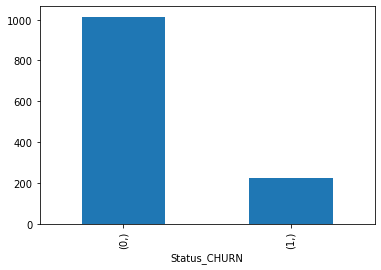

In [15]:
# checkign class imbalance
y.value_counts().plot(kind='bar');

In [16]:
# To address class imbalance 
from imblearn.combine import SMOTETomek
from collections import Counter
sm=SMOTETomek() 
X_sm,y_sm=sm.fit_resample(X,y)
print("The number of classes before resampling {}".format(Counter(y)))
print("The number of classes after resampling {}".format(Counter(y_sm)))

The number of classes before resampling Counter({'Status_CHURN': 1})
The number of classes after resampling Counter({'Status_CHURN': 1})


In [17]:
X_sm

,AGE,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,# total credit transactions for S2,...,CUS_Target,CUS_Gender_MALE,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED,TAR_Desc_LOW,TAR_Desc_MIDLE,TAR_Desc_PLATINUM
0,49,25,277,265,345,1.459127e+06,1.230543e+06,2.068642e+06,10,24,...,2231,1,1,0,0,0,0,0,0,0
1,46,14,37,15,45,3.537255e+04,2.013400e+04,8.385667e+04,2,4,...,2223,0,0,0,0,1,0,1,0,0
2,53,14,31,14,8,2.824885e+04,4.777660e+03,4.348950e+03,14,8,...,2222,0,0,0,0,1,0,0,1,0
3,15,14,0,1,0,0.000000e+00,4.000000e+03,0.000000e+00,5,4,...,2223,0,0,0,0,1,0,1,0,0
4,48,5,15,33,12,6.908338e+04,2.230075e+05,4.637940e+04,8,7,...,2223,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,38,13,6,0,0,1.415219e+04,0.000000e+00,0.000000e+00,0,0,...,2223,0,0,0,0,0,0,1,0,0
1934,40,14,64,53,10,4.073529e+05,1.654540e+05,1.566374e+04,7,3,...,2223,0,0,0,0,1,0,1,0,0
1935,42,14,19,1,0,4.983366e+04,2.898937e+03,0.000000e+00,0,0,...,2222,1,0,0,0,0,0,0,0,0
1936,20,14,0,1,0,0.000000e+00,8.000000e+02,0.000000e+00,0,0,...,2223,1,0,0,0,1,0,1,0,0


In [18]:
y_sm

,Status_CHURN
0,0
1,0
2,0
3,0
4,0
...,...
1933,1
1934,1
1935,1
1936,1


In [19]:
X_trainsm, X_testsm, y_trainsm, y_testsm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=13)
model.fit(X_trainsm,y_trainsm)
y_predsm=model.predict(X_testsm)
print(confusion_matrix(y_testsm,y_predsm))
print(accuracy_score(y_testsm,y_predsm))
print(classification_report(y_testsm,y_predsm))

<ipython-input-19-d6b4fad51ee6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_trainsm,y_trainsm)


[[165  31]
 [ 25 167]]
0.8556701030927835
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       196
           1       0.84      0.87      0.86       192

    accuracy                           0.86       388
   macro avg       0.86      0.86      0.86       388
weighted avg       0.86      0.86      0.86       388



In [20]:
grid_param = {
             "max_features": range(17,22,2),
              'max_depth' : range(14,23,1),
              'min_samples_leaf' : range(1,2,1),
              'min_samples_split': range(2,3,1),
              "bootstrap": [True, False],
              "n_estimators" : range(100,110,2),
              "n_jobs":[-1],
              "criterion" : ["entropy"]
}
grid_search = GridSearchCV(estimator=model,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)





In [21]:
#this may take hours to complete
grid_search.fit(X_trainsm,y_trainsm)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  2.3min finished
/Users/sameerkhan/pythonnotebook/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'criterion': ['entropy'],
                         'max_depth': range(14, 23),
                         'max_features': range(17, 22, 2),
                         'min_samples_leaf': range(1, 2),
                         'min_samples_split': range(2, 3),
                         'n_estimators': range(100, 110, 2), 'n_jobs': [-1]},
             verbose=3)

In [22]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 21,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'n_jobs': -1}

In [35]:
rfc=RandomForestClassifier(criterion='entropy',bootstrap = True ,max_depth=14,max_features=21,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
X_trainsm, X_testsm, y_trainsm, y_testsm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=76)
rfc.fit(X_trainsm,y_trainsm)
y_predsm=rfc.predict(X_testsm)
print(confusion_matrix(y_testsm,y_predsm))
print(accuracy_score(y_testsm,y_predsm))
print(classification_report(y_testsm,y_predsm))

<ipython-input-35-8b0cbbc2627c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_trainsm,y_trainsm)


[[172  14]
 [ 12 190]]
0.9329896907216495
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       186
           1       0.93      0.94      0.94       202

    accuracy                           0.93       388
   macro avg       0.93      0.93      0.93       388
weighted avg       0.93      0.93      0.93       388



In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_testsm,y_predsm, pos_label=1)

In [37]:
auc_score1 = roc_auc_score(y_testsm,y_predsm)
print(auc_score1)

0.9326626211008197


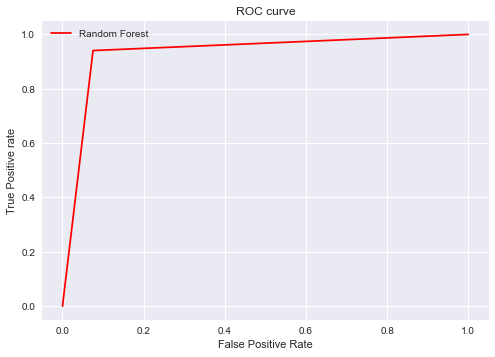

In [39]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='RED', label='Random Forest')


# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=370)
plt.show();

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
from scipy.stats import uniform

In [48]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               "n_jobs":[-1],
               "criterion" : ["entropy"],
               'n_estimators': [130, 180, 230]}
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [49]:
rf_random.fit(X_trainsm,y_trainsm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   24.5s finished
/Users/sameerkhan/pythonnotebook/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230],
                                        'n_jobs': [-1]},
                   random_state=42, verbose=2)

In [51]:
rf_random.best_params_


{'n_jobs': -1,
 'n_estimators': 180,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'criterion': 'entropy',
 'bootstrap': False}

In [52]:
rf_random.best_score_


0.9064556999985006

In [53]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=40,
                       n_estimators=180, n_jobs=-1)

In [74]:
rfc=RandomForestClassifier(criterion='entropy',bootstrap = True ,max_depth=30,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=180)
X_trainsm, X_testsm, y_trainsm, y_testsm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=76)
rfc.fit(X_trainsm,y_trainsm)
y_predsm=rfc.predict(X_testsm)
print(confusion_matrix(y_testsm,y_predsm))
print(accuracy_score(y_testsm,y_predsm))
print(classification_report(y_testsm,y_predsm))

<ipython-input-74-c4fd8221fa9f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_trainsm,y_trainsm)


[[172  14]
 [  9 193]]
0.9407216494845361
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       186
           1       0.93      0.96      0.94       202

    accuracy                           0.94       388
   macro avg       0.94      0.94      0.94       388
weighted avg       0.94      0.94      0.94       388



In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_testsm,y_predsm, pos_label=1)

In [76]:
auc_score1 = roc_auc_score(y_testsm,y_predsm)
print(auc_score1)

0.9400883636750772


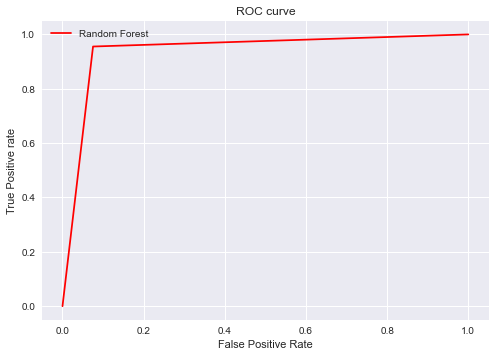

In [77]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='RED', label='Random Forest')


# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=370)
plt.show();